## Import the relevant packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

In [2]:
# Read the CSV into a dataframe

header_names = ['sample_code_number', 'clump_thickness', 'uniformity_cell_size', 'uniformity_cell_shape', 'marginal_adhesion', 'cell_size', 'bare_nuclei', 'bland_chromatin', 'normal_nucleoli', 'mitosis', 'class']
data_df = pd.read_csv('breast-cancer-wisconsin - Copy.csv', header = None, names = header_names)



## Data wrangling

In [3]:
# Looking back at lecture, it is also possible to use regular expression to determine which entries are integers. Give this a try later.
indices_with_unexpected_values_in_bare_nuclei = ~data_df.bare_nuclei.isin(['1','2','3','4','5','6','7','8','9','10'])

rows_with_unexpected_values_in_bare_nuclei = data_df[~data_df.bare_nuclei.isin(['1','2','3','4','5','6','7','8','9','10'])]

print(rows_with_unexpected_values_in_bare_nuclei[['bare_nuclei', 'class']])
missing_by_tumor_class = rows_with_unexpected_values_in_bare_nuclei[['bare_nuclei', 'class']].groupby('class').count()
population_by_tumor_class = data_df['class'].value_counts()

percentage_missing_in_benign = 100*missing_by_tumor_class.loc[2,'bare_nuclei']/population_by_tumor_class[2]
percentage_missing_in_malignant = 100*missing_by_tumor_class.loc[4,'bare_nuclei']/population_by_tumor_class[4]

print("Percentage of missing bare_nuclei in benign tumors: {0:2.2f}%".format( percentage_missing_in_benign))
print("Percentage of missing bare_nuclei in malignant tumors: {0:2.2f}%".format( percentage_missing_in_malignant))
# Class: (2 for benign, 4 for malignant)

data_df = data_df[~indices_with_unexpected_values_in_bare_nuclei]

data_df.bare_nuclei = data_df.bare_nuclei.astype('int64')

    bare_nuclei  class
23            ?      4
40            ?      2
139           ?      2
145           ?      2
158           ?      2
164           ?      2
235           ?      2
249           ?      2
275           ?      2
292           ?      4
294           ?      2
297           ?      2
315           ?      2
321           ?      2
411           ?      2
617           ?      2
Percentage of missing bare_nuclei in benign tumors: 3.06%
Percentage of missing bare_nuclei in malignant tumors: 0.83%


Since the missing values are a small portion of the entire dataset, it is safe to drop the missing data and change the type of bare_nuclei to int. 

In [4]:
data_df = data_df[~indices_with_unexpected_values_in_bare_nuclei]

data_df.bare_nuclei = data_df.bare_nuclei.astype('int64')
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 11 columns):
sample_code_number       683 non-null int64
clump_thickness          683 non-null int64
uniformity_cell_size     683 non-null int64
uniformity_cell_shape    683 non-null int64
marginal_adhesion        683 non-null int64
cell_size                683 non-null int64
bare_nuclei              683 non-null int64
bland_chromatin          683 non-null int64
normal_nucleoli          683 non-null int64
mitosis                  683 non-null int64
class                    683 non-null int64
dtypes: int64(11)
memory usage: 64.0 KB


C:\Users\iamga\Miniconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


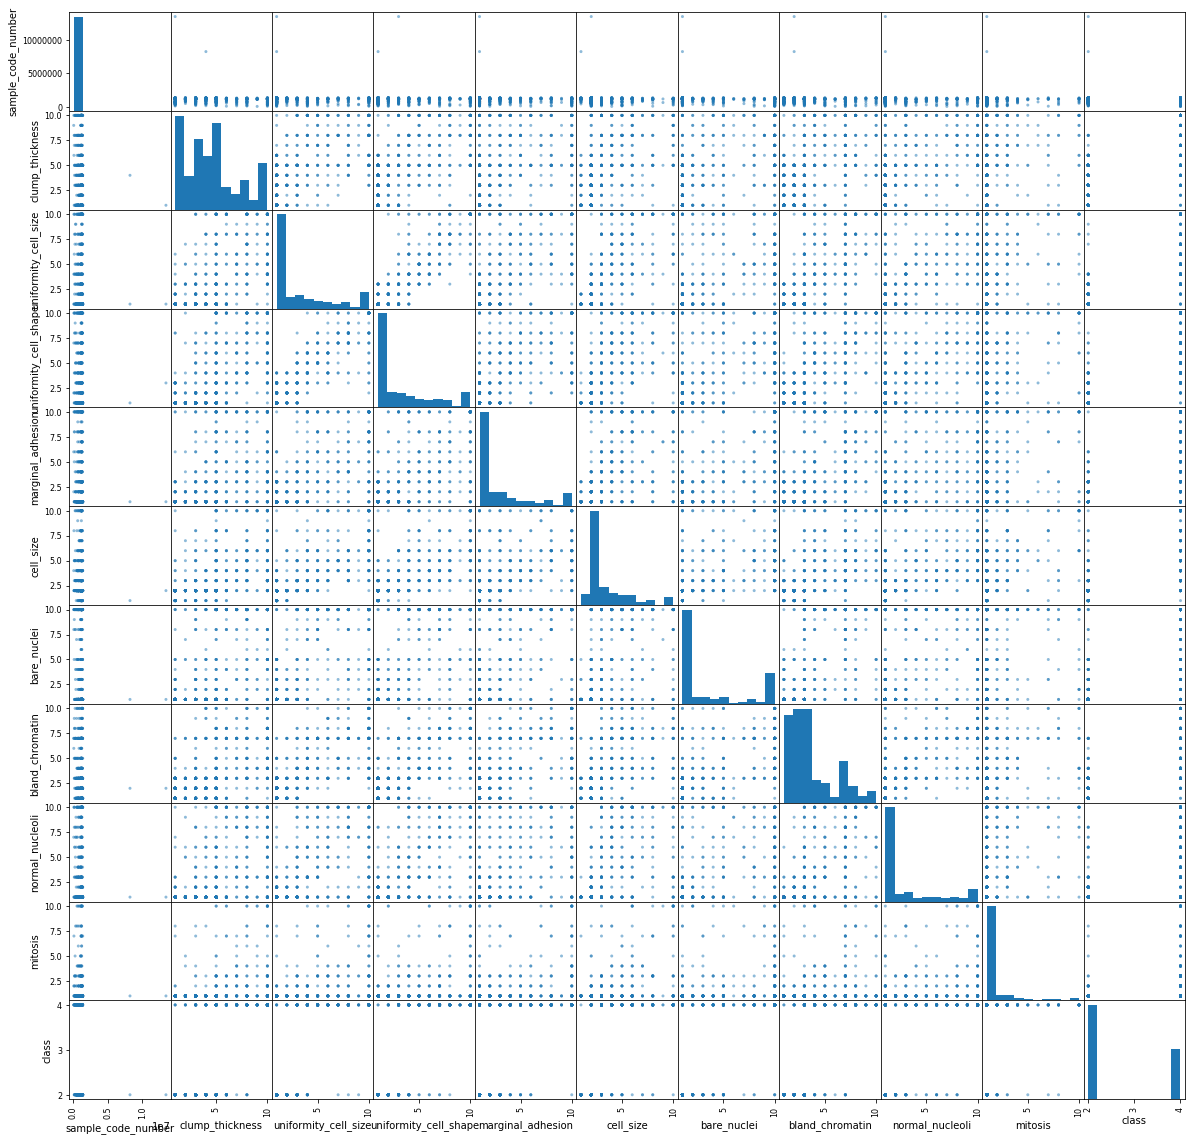

In [5]:
attributes = ['sample_code_number', 'clump_thickness', 'uniformity_cell_size', 'uniformity_cell_shape', 'marginal_adhesion', 'cell_size', 'bare_nuclei', 'bland_chromatin', 'normal_nucleoli', 'mitosis', 'class']
pd.plotting.scatter_matrix(data_df[attributes], figsize=(20,20), range_padding=0.1)

plt.savefig('scatter_matrix.png')

#plt.xlabels(rotation = 60)
plt.show()

In [6]:
correlation_matrix = data_df.corr()
correlation_matrix

,sample_code_number,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitosis,class
sample_code_number,1.000000,-0.056350,-0.041396,-0.042221,-0.069630,-0.048644,-0.099248,-0.061966,-0.050699,-0.037972,-0.084701
clump_thickness,-0.056350,1.000000,0.642481,0.653470,0.487829,0.523596,0.593091,0.553742,0.534066,0.350957,0.714790
uniformity_cell_size,-0.041396,0.642481,1.000000,0.907228,0.706977,0.753544,0.691709,0.755559,0.719346,0.460755,0.820801
uniformity_cell_shape,-0.042221,0.653470,0.907228,1.000000,0.685948,0.722462,0.713878,0.735344,0.717963,0.441258,0.821891
marginal_adhesion,-0.069630,0.487829,0.706977,0.685948,1.000000,0.594548,0.670648,0.668567,0.603121,0.418898,0.706294
cell_size,-0.048644,0.523596,0.753544,0.722462,0.594548,1.000000,0.585716,0.618128,0.628926,0.480583,0.690958
bare_nuclei,-0.099248,0.593091,0.691709,0.713878,0.670648,0.585716,1.000000,0.680615,0.584280,0.339210,0.822696
bland_chromatin,-0.061966,0.553742,0.755559,0.735344,0.668567,0.618128,0.680615,1.000000,0.665602,0.346011,0.758228
normal_nucleoli,-0.050699,0.534066,0.719346,0.717963,0.603121,0.628926,0.584280,0.665602,1.000000,0.433757,0.718677
mitosis,-0.037972,0.350957,0.460755,0.441258,0.418898,0.480583,0.339210,0.346011,0.433757,1.000000,0.423448


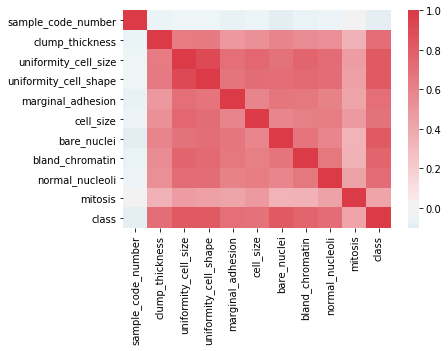

In [7]:
diverging_cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(correlation_matrix, cmap=diverging_cmap, center=0)

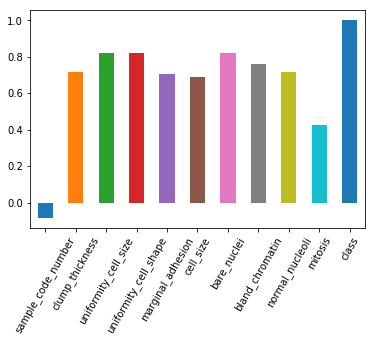

In [8]:
correlation_matrix['class'].plot(kind='bar')
plt.xticks(rotation = 60)
plt.show()

## Observations

We can see extremely strong correlation between 'uniformity_cell_size' and 'class'. Similarly, 'uniformity_cell_shape' and 'bare_nuclei' are very strongly correlated with 'class'.

However, 'uniformity_cell_size' and 'uniformity_cell_shape' are very strongly correlated as well. We will have to be careful when using machine learning algorithms on these highly correlated features.

## Hypothesis testing

We will test whether there is significant difference between 'uniformity_cell_size' for benign vs malignant samples.

Lets define

$\mu_{UCS}^{benign}$:  'uniformity_cell_size' for benign samples

$\mu_{UCS}^{malignant}$:  'uniformity_cell_size' for malignant samples

and test the following hypothesis

$H_0$: $\mu_{UCS}^{benign} = \mu_{UCS}^{malignant}$

$H_a$: $\mu_{UCS}^{benign} \neq \mu_{UCS}^{malignant}$

In [9]:
# extract the two populations
benign_UCS = data_df[data_df['class'] == 2]['uniformity_cell_size']

malignant_UCS = data_df[data_df['class'] == 4]['uniformity_cell_size']


In [10]:
benign_UCS

0      1
1      4
2      1
3      8
4      1
6      1
7      1
8      1
9      2
10     1
11     1
13     1
16     1
17     1
19     1
22     1
24     1
26     2
27     1
28     1
29     1
30     1
31     1
33     1
34     1
35     1
37     2
45     1
47     1
48     1
      ..
660    1
661    1
662    1
663    1
664    1
665    1
666    2
667    1
671    2
672    1
673    3
674    1
675    1
676    1
677    1
678    1
679    1
682    1
683    1
684    1
685    1
686    1
687    1
688    1
689    1
690    1
692    1
693    1
694    1
695    1
Name: uniformity_cell_size, Length: 444, dtype: int64

In [11]:
malignant_UCS

5      10
12      3
14      7
15      4
18      7
20      3
21      5
25      2
32      7
36     10
38      4
39      5
41      4
42     10
43      6
44     10
46      7
49      8
50      5
51      3
52      3
53      5
54      5
55      6
56     10
57      2
58      2
59      5
60      3
62     10
       ..
574     9
581     7
582    10
586    10
588     8
590    10
591     5
592     3
594     8
603     4
604     3
605     5
608    10
610     4
611    10
612    10
626     6
633     7
636    10
648    10
658     8
668     7
669    10
670    10
680    10
681    10
691    10
696    10
697     8
698     8
Name: uniformity_cell_size, Length: 239, dtype: int64

In [12]:
# Define bootstrapping functions

def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data,func)

    return bs_replicates


In [13]:
# Look at the overall and individual population means

mean_UCS = np.mean(data_df['uniformity_cell_size'])
print(mean_UCS)

mean_UCS_benign = np.mean(benign_UCS)
mean_UCS_malignant = np.mean(malignant_UCS)

print(mean_UCS_benign)
print(mean_UCS_malignant)

3.150805270863836
1.3063063063063063
6.577405857740586


In [14]:
# Shift the benign and malignant population means to the total population means assuming the null hypothesis


shifted_benign_UCS = benign_UCS - mean_UCS_benign + mean_UCS
shifted_malignant_UCS = malignant_UCS - mean_UCS_malignant + mean_UCS

In [15]:
# draw boostrap replicates
benign_UCS_replicates= draw_bs_reps(shifted_benign_UCS, np.mean, size=1000000)
malignant_UCS_replicates= draw_bs_reps(shifted_malignant_UCS, np.mean, size=1000000)

diff_of_means_bs_replicates = benign_UCS_replicates - malignant_UCS_replicates

# compute p-value
p_value = np.sum((np.abs(diff_of_means_bs_replicates) >= (mean_UCS_malignant - mean_UCS_benign)))/float(len(diff_of_means_bs_replicates))
print(p_value)

0.0


### Conclusion

Since p_value < 1e-6, we can reject the null hypothessis.

There is strong statistical evidence that the mean uniformity of cell size is different for benign versus malignant samples. 

There is also big practical difference (6.5-1.3 = 5.2 on a scale of 10) in the uniformity of cell size of benign versus malignant samples.